# Ephys Features Short vs. Tall Apicals

##### Imports

In [1]:
import os
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

from temp_funcs import path, csv_path, path_jem, \
read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

In [2]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.5)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Paths/Fields

In [3]:
fields_morph = ["name", "id", "specimen_id",
                "vrest", "ri", "sag", "tau", "upstroke_downstroke_ratio_long_square", 
                "latency", "f_i_curve_slope"]
path_morph = os.path.join(csv_path, "ephys_mIVSCC_MET.csv")
plot_path = os.path.join(path, "plot/short_tall_plot/")

In [4]:
morph = read_file(path_morph, fields_morph)
morph = drop_nans(morph, ["specimen_id"])

INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Dropped NaNs from these columns: ['specimen_id']


##### List of short and tall apicals for L6 IT VISp Col23a1 Adamts2 & L6 CT VISp Ctxn3 Brinp3

In [5]:
adam_short = ["661513942", "740290698", "741213831", "917624301", "919091442", "919979431",
              "934844641", "971517180", "972447551"]
adam_tall = ["740318831", "922562221", "969200089"]
adam_list = sorted(adam_short + adam_tall)

In [6]:
brin_short = ["724539260", "863429616", "864068767", "902140767", "904935208", "942421907"]
brin_tall = ["653195521", "851542876", "851580386", "853618984", "863404974", "863418322",
             "893371082", "903831482", "907357811", "927797864", "935214823"]
brin_list = sorted(brin_short + brin_tall)

#missing 863429616 from brin_short

In [7]:
all_list = sorted(adam_list + brin_list)

In [8]:
len(all_list)

29

##### Setting up dataframe with lists

In [9]:
morph = morph[morph['specimen_id'].isin(all_list)]
morph.sort_values("specimen_id", inplace=True)
len(morph)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28

In [10]:
morph["subclass"] = pd.np.where(morph.specimen_id.isin(adam_list), "L6 IT VISp Col23a1 Adamts2", "L6 CT VISp Ctxn3 Brinp3")

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
morpha = morph[morph.subclass == "L6 IT VISp Col23a1 Adamts2"]
morphb = morph[morph.subclass == "L6 CT VISp Ctxn3 Brinp3"]

In [12]:
morpha["morpho_type"] = pd.np.where(morpha.specimen_id.isin(adam_short), "Short", "Tall")
morphb["morpho_type"] = pd.np.where(morphb.specimen_id.isin(brin_short), "Short", "Tall")

morpha.sort_values("specimen_id", inplace=True)
morphb.sort_values("specimen_id", inplace=True)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

##### L6 IT VISp Col23a1 Adamts2

In [13]:
v_colors={"Short": "#ef3b2c", "Tall": "#4292c6"}

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Short v.s. Tall: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.956e-01 U_stat=6.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Short v.s. Tall: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.533e-01 U_stat=1.500e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Short v.s. Tall: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.791e-01 U_stat=1.700e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04


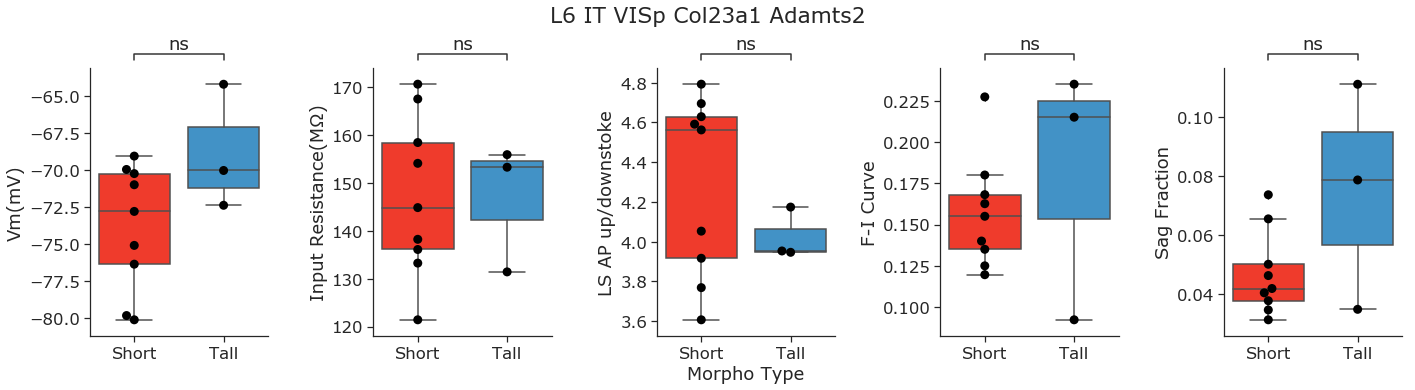

In [14]:
f, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=5, sharex=True)

x="morpho_type"

ax0 = sns.boxplot(x=x, y="vrest", data=morpha, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[0])
ax0 = sns.swarmplot(x=x, y="vrest", data=morpha, 
                    order=v_colors, color="black", size=9, ax=axes[0])
add_stat_annotation(ax0, data=morpha, x=x, y="vrest", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax1 = sns.boxplot(x=x, y="ri", data=morpha, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[1])
ax1 = sns.swarmplot(x=x, y="ri", data=morpha, 
                    order=v_colors, color="black", size=9, ax=axes[1])
add_stat_annotation(ax1, data=morpha, x=x, y="ri", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax2 = sns.boxplot(x=x, y="upstroke_downstroke_ratio_long_square", data=morpha, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[2])
ax2 = sns.swarmplot(x=x, y="upstroke_downstroke_ratio_long_square", data=morpha, 
                    order=v_colors, color="black", size=9, ax=axes[2])
add_stat_annotation(ax2, data=morpha, x=x, y="upstroke_downstroke_ratio_long_square", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax3 = sns.boxplot(x=x, y="f_i_curve_slope", data=morpha, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[3])
ax3 = sns.swarmplot(x=x, y="f_i_curve_slope", data=morpha, 
                    order=v_colors, color="black", size=9, ax=axes[3])
add_stat_annotation(ax3, data=morpha, x=x, y="f_i_curve_slope", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax4 = sns.boxplot(x=x, y="sag", data=morpha, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[4])
ax4 = sns.swarmplot(x=x, y="sag", data=morpha, 
                    order=v_colors, color="black", size=9, ax=axes[4])
add_stat_annotation(ax4, data=morpha, x=x, y="sag", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Morpho Type")
ax3.set_xlabel("")
ax4.set_xlabel("")

ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("L6 IT VISp Col23a1 Adamts2", y=1.10)
plt.savefig(plot_path + "adamts_ephys_features.jpeg", bbox_inches="tight")

##### L6 CT VISp Ctxn3 Brinp3

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Short v.s. Tall: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.800e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Short v.s. Tall: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.079e-01 U_stat=3.700e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Short v.s. Tall: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.136e-02 U_stat=8.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04


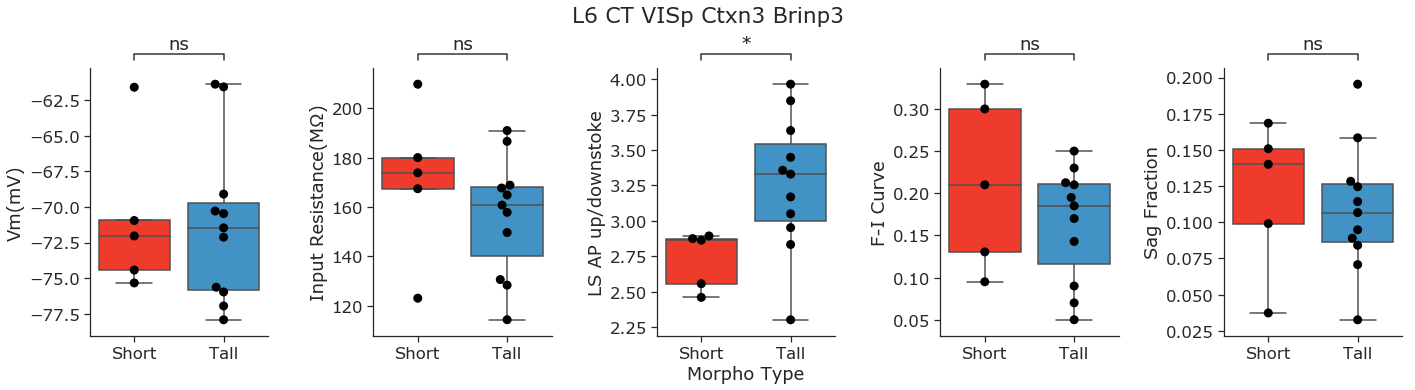

In [15]:
f, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=5, sharex=True)

x="morpho_type"

ax0 = sns.boxplot(x=x, y="vrest", data=morphb, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[0])
ax0 = sns.swarmplot(x=x, y="vrest", data=morphb, 
                    order=v_colors, color="black", size=9, ax=axes[0])
add_stat_annotation(ax0, data=morphb, x=x, y="vrest", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax1 = sns.boxplot(x=x, y="ri", data=morphb, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[1])
ax1 = sns.swarmplot(x=x, y="ri", data=morphb, 
                    order=v_colors, color="black", size=9, ax=axes[1])
add_stat_annotation(ax1, data=morphb, x=x, y="ri", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax2 = sns.boxplot(x=x, y="upstroke_downstroke_ratio_long_square", data=morphb, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[2])
ax2 = sns.swarmplot(x=x, y="upstroke_downstroke_ratio_long_square", data=morphb, 
                    order=v_colors, color="black", size=9, ax=axes[2])
add_stat_annotation(ax2, data=morphb, x=x, y="upstroke_downstroke_ratio_long_square", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax3 = sns.boxplot(x=x, y="f_i_curve_slope", data=morphb, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[3])
ax3 = sns.swarmplot(x=x, y="f_i_curve_slope", data=morphb, 
                    order=v_colors, color="black", size=9, ax=axes[3])
add_stat_annotation(ax3, data=morphb, x=x, y="f_i_curve_slope", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax4 = sns.boxplot(x=x, y="sag", data=morphb, 
                  order=v_colors, palette=v_colors, saturation=1, ax=axes[4])
ax4 = sns.swarmplot(x=x, y="sag", data=morphb, 
                    order=v_colors, color="black", size=9, ax=axes[4])
add_stat_annotation(ax4, data=morphb, x=x, y="sag", order=v_colors, box_pairs=[("Short", "Tall")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Morpho Type")
ax3.set_xlabel("")
ax4.set_xlabel("")

ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("L6 CT VISp Ctxn3 Brinp3", y=1.10)
plt.savefig(plot_path + "brinp3_ephys_features.jpeg", bbox_inches="tight")